In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

from haversine import haversine
from scipy.spatial.distance import euclidean , cityblock
from geopy.distance import great_circle
from math import *

from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

import folium 
from folium import plugins
from folium.plugins import HeatMap
import baseline 

output_notebook()

Loading BokehJS ...

In [2]:
st = pd.read_csv("Divvy_Trip.csv")

In [3]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [4]:
st.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
#A2 To create a new column 'ride_category' and initialize it as 'paying'
st['ride_category'] = 'paying'

In [6]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_category
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,paying
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,paying
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,paying
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,paying
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,paying


In [7]:
import datetime

In [8]:
#A3
st["started_at"] = pd.to_datetime(st["started_at"])
st["ended_at"] = pd.to_datetime(st["ended_at"])

In [9]:
#A4
st["ride_duration_sec"] = st["ended_at"]-st["started_at"]

In [10]:
#A5
st['ride_duration_sec']=st["ride_duration_sec"].apply(lambda x:int(x.total_seconds()))

In [11]:
st["ride_duration_sec"]

0         773
1         729
2         260
3         326
4         690
         ... 
537108    824
537109    924
537110    800
537111      4
537112    705
Name: ride_duration_sec, Length: 537113, dtype: int64

In [12]:
#A6
st["ride_duration_min"] = round(st["ride_duration_sec"]/60, 2)

In [13]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_category,ride_duration_sec,ride_duration_min
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,paying,773,12.88
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,paying,729,12.15
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,paying,260,4.33
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,paying,326,5.43
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,paying,690,11.50


In [14]:
#A7 To generate the hour, minute, days and month columns
st["hour"] = st["started_at"].dt.hour
st["minute"] = st["started_at"].dt.minute
st["day_week"] = st["started_at"].dt.dayofweek
st["month"] = st["started_at"].dt.month

In [15]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,paying,773,12.88,10,36,6,10
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,paying,729,12.15,17,23,2,10
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,paying,260,4.33,7,2,3,10
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,paying,326,5.43,19,13,1,10
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,paying,690,11.50,18,19,0,10


In [16]:
#A8 Categorize riders based on ride duration
st.loc[st["ride_duration_min"] <= 45, "ride_category"] = "free ride"


In [17]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,free ride,773,12.88,10,36,6,10
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,free ride,729,12.15,17,23,2,10
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,free ride,260,4.33,7,2,3,10
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,free ride,326,5.43,19,13,1,10
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,free ride,690,11.50,18,19,0,10


In [18]:
st["ride_category"].unique()

array(['free ride', 'paying'], dtype=object)

In [19]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,free ride,773,12.88,10,36,6,10
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,free ride,729,12.15,17,23,2,10
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,free ride,260,4.33,7,2,3,10
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,free ride,326,5.43,19,13,1,10
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,free ride,690,11.50,18,19,0,10


In [20]:
#A9
st["day_week_name"] = st["started_at"].dt.day_name()

In [21]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,-87.653818,member,free ride,773,12.88,10,36,6,10,Sunday
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,-87.653818,member,free ride,729,12.15,17,23,2,10,Wednesday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,-87.635500,member,free ride,260,4.33,7,2,3,10,Thursday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,-87.635500,member,free ride,326,5.43,19,13,1,10,Tuesday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,-87.635500,member,free ride,690,11.50,18,19,0,10,Monday


In [22]:
#A10 To create a new column 'ride_time_category' and initialize it as 'Off-Peak'
st['ride_time_category'] = 'Off-Peak'

In [23]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,member,free ride,773,12.88,10,36,6,10,Sunday,Off-Peak
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,member,free ride,729,12.15,17,23,2,10,Wednesday,Off-Peak
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,member,free ride,260,4.33,7,2,3,10,Thursday,Off-Peak
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,member,free ride,326,5.43,19,13,1,10,Tuesday,Off-Peak
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,member,free ride,690,11.50,18,19,0,10,Monday,Off-Peak


In [24]:
#A11 To categorize rides based on time of day
peak_hours_start = 7
peak_hours_end = 10
st.loc[(st['started_at'].dt.hour >= peak_hours_start) & (st['started_at'].dt.hour 
<= peak_hours_end), 'ride_time_category'] = 'Peak'

In [25]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,member,free ride,773,12.88,10,36,6,10,Sunday,Peak
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,member,free ride,729,12.15,17,23,2,10,Wednesday,Off-Peak
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,member,free ride,260,4.33,7,2,3,10,Thursday,Peak
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,member,free ride,326,5.43,19,13,1,10,Tuesday,Off-Peak
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,member,free ride,690,11.50,18,19,0,10,Monday,Off-Peak


In [26]:
#A12 Create a new column 'ride_day_category' and initialize it as 'Weekday'
st["ride_day_category"] = "Weekday"

In [27]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category,ride_day_category
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,free ride,773,12.88,10,36,6,10,Sunday,Peak,Weekday
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,free ride,729,12.15,17,23,2,10,Wednesday,Off-Peak,Weekday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,free ride,260,4.33,7,2,3,10,Thursday,Peak,Weekday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,free ride,326,5.43,19,13,1,10,Tuesday,Off-Peak,Weekday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,free ride,690,11.50,18,19,0,10,Monday,Off-Peak,Weekday


In [28]:
#A13 Categorize rides based on the day of the week
st.loc[st["started_at"].dt.dayofweek >= 5, "ride_day_category"] = "Weekend"

In [29]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_category,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category,ride_day_category
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,free ride,773,12.88,10,36,6,10,Sunday,Peak,Weekend
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,free ride,729,12.15,17,23,2,10,Wednesday,Off-Peak,Weekday
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,free ride,260,4.33,7,2,3,10,Thursday,Peak,Weekday
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,free ride,326,5.43,19,13,1,10,Tuesday,Off-Peak,Weekday
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,free ride,690,11.50,18,19,0,10,Monday,Off-Peak,Weekday


In [30]:
#A14 To calculate the distance of each trip usingg the latitude and the longitude

distance = []

for i in list(range(0,len(st))):
    coord1 = (st['start_lat'][i], st['start_lng'][i])
    coord2 = (st['end_lat'][i], st['end_lng'][i])
    distance.append(haversine(coord1,coord2))
    
st['distance']=distance

In [31]:
distance = st["distance"]


In [32]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category,ride_day_category,distance
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,773,12.88,10,36,6,10,Sunday,Peak,Weekend,2.923897
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,729,12.15,17,23,2,10,Wednesday,Off-Peak,Weekday,3.740056
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,260,4.33,7,2,3,10,Thursday,Peak,Weekday,1.370740
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,326,5.43,19,13,1,10,Tuesday,Off-Peak,Weekday,0.806927
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,690,11.50,18,19,0,10,Monday,Off-Peak,Weekday,0.806927


In [33]:
st.shape

(537113, 24)

### Data Cleaning

In [34]:
st.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    84412
start_station_id      84412
end_station_name      89253
end_station_id        89253
start_lat                 0
start_lng                 0
end_lat                 592
end_lng                 592
member_casual             0
ride_category             0
ride_duration_sec         0
ride_duration_min         0
hour                      0
minute                    0
day_week                  0
month                     0
day_week_name             0
ride_time_category        0
ride_day_category         0
distance                592
dtype: int64

In [35]:
st["start_station_name"].mode()

0    University Ave & 57th St
Name: start_station_name, dtype: object

In [36]:
st["start_station_name"].fillna("University Ave & 57th St", inplace=True)

In [37]:
st["start_station_id"].mode()

0    KA1503000071
Name: start_station_id, dtype: object

In [38]:
st["start_station_id"].fillna("KA1503000071", inplace=True)

In [39]:
st["end_station_name"].mode()

0    Streeter Dr & Grand Ave
Name: end_station_name, dtype: object

In [40]:
st["end_station_name"].fillna("Streeter Dr & Grand Ave", inplace=True)

In [41]:
st["end_station_id"].mode()

0    13022
Name: end_station_id, dtype: object

In [42]:
st["end_station_id"].fillna("13022", inplace=True)

In [43]:
st.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      0
start_station_id        0
end_station_name        0
end_station_id          0
start_lat               0
start_lng               0
end_lat               592
end_lng               592
member_casual           0
ride_category           0
ride_duration_sec       0
ride_duration_min       0
hour                    0
minute                  0
day_week                0
month                   0
day_week_name           0
ride_time_category      0
ride_day_category       0
distance              592
dtype: int64

In [44]:
st.dropna(inplace=True)

In [45]:
st.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_category         0
ride_duration_sec     0
ride_duration_min     0
hour                  0
minute                0
day_week              0
month                 0
day_week_name         0
ride_time_category    0
ride_day_category     0
distance              0
dtype: int64

In [46]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category,ride_day_category,distance
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,773,12.88,10,36,6,10,Sunday,Peak,Weekend,2.923897
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,729,12.15,17,23,2,10,Wednesday,Off-Peak,Weekday,3.740056
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,260,4.33,7,2,3,10,Thursday,Peak,Weekday,1.370740
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,326,5.43,19,13,1,10,Tuesday,Off-Peak,Weekday,0.806927
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,690,11.50,18,19,0,10,Monday,Off-Peak,Weekday,0.806927


In [47]:
st.shape

(536521, 24)

EXPLORATORY DATA ANALYSIS

### 1. What is the proportion of rides made by members compared to casual users?

In [48]:
prop_ride = st["member_casual"].value_counts().to_frame().reset_index()
prop_ride

,member_casual,count
0,member,359904
1,casual,176617


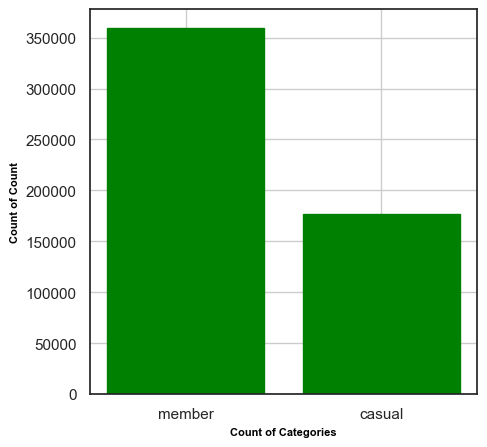

In [49]:
x = prop_ride["member_casual"]
y = prop_ride["count"]

plt.figure(figsize=(5,5))
plt.bar(x,y, color="green", edgecolor = "green")
plt.xlabel("Count of Categories", fontsize=8, fontweight="bold", color = "black")
plt.ylabel("Count of Count", fontsize=8, fontweight="bold", color = "black")
plt.grid()

### 2. Which start station has the highest average ride duration?

In [50]:
station_name = st.groupby("start_station_name")["ride_duration_min"].mean().to_frame().reset_index()
station_name

,start_station_name,ride_duration_min
0,2112 W Peterson Ave,14.884627
1,63rd St Beach,30.350635
2,900 W Harrison St,11.315522
3,Aberdeen St & Jackson Blvd,11.204592
4,Aberdeen St & Monroe St,12.806034
...,...,...
1183,Woodlawn Ave & 58th St,11.783418
1184,Woodlawn Ave & 75th St,15.450714
1185,Woodlawn Ave & Lake Park Ave,15.789211
1186,Yates Blvd & 75th St,7.129444


In [51]:
highest_station_name = station_name.sort_values(by="ride_duration_min", ascending=False)
highest_station_name

,start_station_name,ride_duration_min
53,Big Marsh Park,198.191111
605,Phillips Ave & 83rd St,113.325000
735,Public Rack - Kedzie & 73rd,101.080000
864,Public Rack - Pratt Ave & Odell Ave,100.500000
260,Eberhart Ave & 131st St,100.480000
...,...,...
918,Public Rack - Western Ave & 105th St,2.050000
771,Public Rack - Lamon Ave & Erie St,1.830000
629,Public Rack - Austin Branch Chicago Public Lib...,1.570000
919,Public Rack - Western Ave & 106th St - West,0.970000


In [52]:
top_5_stations = highest_station_name.head(5).reset_index()
top_5_stations

,index,start_station_name,ride_duration_min
0,53,Big Marsh Park,198.191111
1,605,Phillips Ave & 83rd St,113.325000
2,735,Public Rack - Kedzie & 73rd,101.080000
3,864,Public Rack - Pratt Ave & Odell Ave,100.500000
4,260,Eberhart Ave & 131st St,100.480000


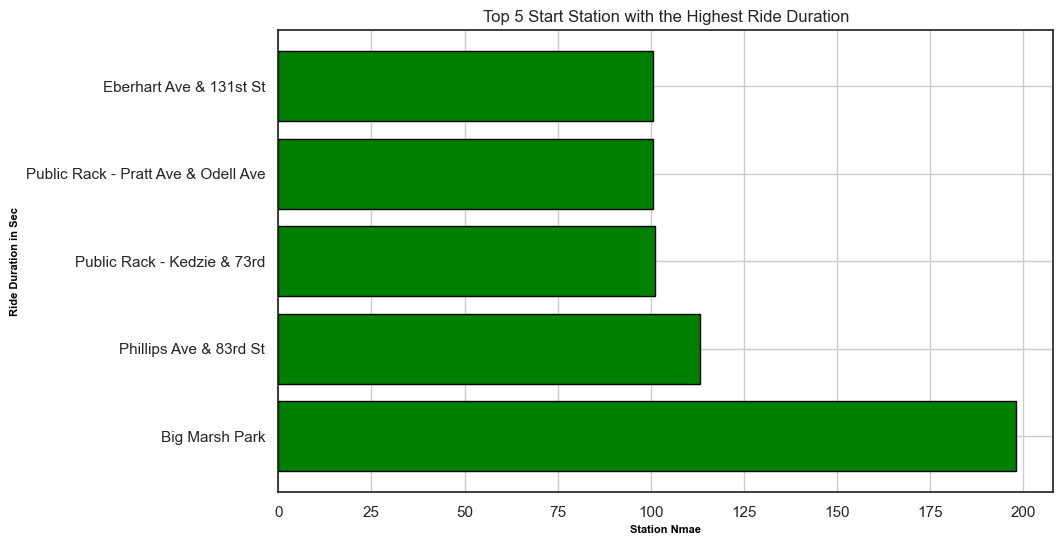

In [53]:
x = top_5_stations["start_station_name"]
y = top_5_stations["ride_duration_min"]

plt.figure(figsize=(10, 6))
plt.barh(x,y, color="green", edgecolor = "black")
plt.title("Top 5 Start Station with the Highest Ride Duration")
plt.xlabel("Station Nmae", fontsize=8, fontweight="bold", color = "black")
plt.ylabel("Ride Duration in Sec", fontsize=8, fontweight="bold", color = "black")
plt.grid()

### 3. Do the proportions of free and paying rides change during different days of the week?

In [54]:
count_ride_cat = st["ride_category"].value_counts()
count_ride_cat

ride_category
free ride    518512
paying        18009
Name: count, dtype: int64

In [55]:
prop_ride_cat = st.groupby(["ride_category", "day_week_name"]).size().unstack(fill_value=0)
prop_ride_cat

day_week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
ride_category,,,,,,,
free ride,61927,80698,57913,79774,68482,92704,77014
paying,1829,2408,2711,5093,1362,2597,2009


In [56]:
ride_prop = prop_ride_cat.div(prop_ride_cat.sum(axis=1), axis=0)
ride_prop

day_week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
ride_category,,,,,,,
free ride,0.119432,0.155634,0.111691,0.153852,0.132074,0.178789,0.148529
paying,0.101560,0.133711,0.150536,0.282803,0.075629,0.144206,0.111555


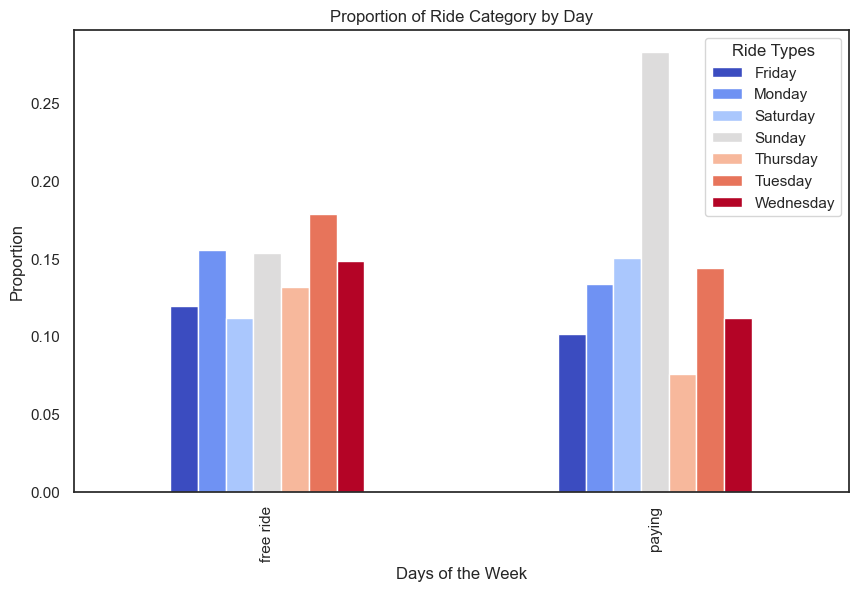

In [57]:
ride_prop.plot(kind="bar", stacked=False, colormap="coolwarm", figsize=(10,6))
plt.title("Proportion of Ride Category by Day")
plt.xlabel("Days of the Week")
plt.ylabel("Proportion")
plt.legend(title="Ride Types")
plt.show()

### 4. Visualize the frequency of rides for member and casual riders during peak and off-peak times.

In [58]:
frq_rides = st.groupby(["member_casual", "ride_time_category"]).size().unstack(fill_value=0)
frq_rides

ride_time_category,Off-Peak,Peak
member_casual,,
casual,146814,29803
member,283035,76869


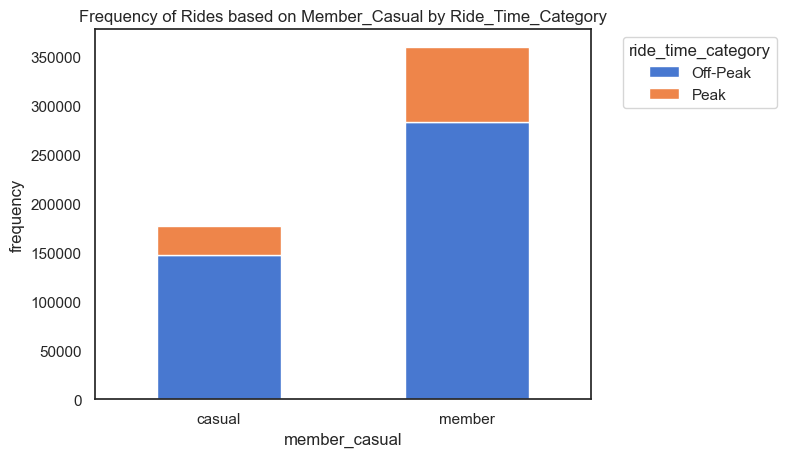

In [59]:
frq_rides.plot(kind= "bar", stacked =True)
plt.title("Frequency of Rides based on Member_Casual by Ride_Time_Category")
plt.xlabel("member_casual")
plt.ylabel("frequency")
plt.xticks(rotation=0)
plt.legend(title="ride_time_category", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

### 5. Visualize patterns in ride start times on weekends.

In [60]:
weekend_ride = st[st["ride_day_category"].isin(["Weekend"])]
weekend_ride

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category,ride_day_category,distance
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,...,773,12.88,10,36,6,10,Sunday,Peak,Weekend,2.923897
16,2E536F84DAC106A9,classic_bike,2023-10-22 14:12:30,2023-10-22 14:22:48,Larrabee St & North Ave,TA1306000008,Sheffield Ave & Webster Ave,TA1309000033,41.910210,-87.643500,...,618,10.30,14,12,6,10,Sunday,Off-Peak,Weekend,1.521866
18,DA0803D1C2EB4F62,electric_bike,2023-10-29 13:52:13,2023-10-29 14:00:51,Wolcott Ave & Polk St,TA1309000064,Morgan St & Polk St,TA1307000130,41.871380,-87.673579,...,518,8.63,13,52,6,10,Sunday,Off-Peak,Weekend,1.867465
22,49F4D9F1E644102E,electric_bike,2023-10-14 10:10:22,2023-10-14 10:25:24,Larrabee St & Division St,KA1504000079,Sheffield Ave & Webster Ave,TA1309000033,41.903519,-87.643336,...,902,15.03,10,10,5,10,Saturday,Peak,Weekend,2.183520
23,EDF281285B71D09A,classic_bike,2023-10-15 09:56:20,2023-10-15 10:04:06,Halsted St & Clybourn Ave,331,Sheffield Ave & Webster Ave,TA1309000033,41.909668,-87.648128,...,466,7.77,9,56,6,10,Sunday,Peak,Weekend,1.401552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537092,1F304B724B75E828,classic_bike,2023-10-01 21:21:43,2023-10-01 21:44:55,Clinton St & Washington Blvd,WL-012,Clark St & 9th St (AMLI),SL-009,41.883380,-87.641170,...,1392,23.20,21,21,6,10,Sunday,Off-Peak,Weekend,1.620759
537096,36CB6C0F0F12AA48,electric_bike,2023-10-14 10:56:25,2023-10-14 11:00:00,Clark St & Lincoln Ave,13179,Clark St & Lincoln Ave,13179,41.915737,-87.634578,...,215,3.58,10,56,5,10,Saturday,Peak,Weekend,0.005612
537097,10E83334781CE974,classic_bike,2023-10-21 15:05:29,2023-10-21 15:06:25,Clark St & 9th St (AMLI),SL-009,Clark St & 9th St (AMLI),SL-009,41.870816,-87.631246,...,56,0.93,15,5,5,10,Saturday,Off-Peak,Weekend,0.000000
537105,FDF083F0E92F13E4,classic_bike,2023-10-28 09:27:51,2023-10-28 09:28:55,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,...,64,1.07,9,27,5,10,Saturday,Peak,Weekend,0.000000


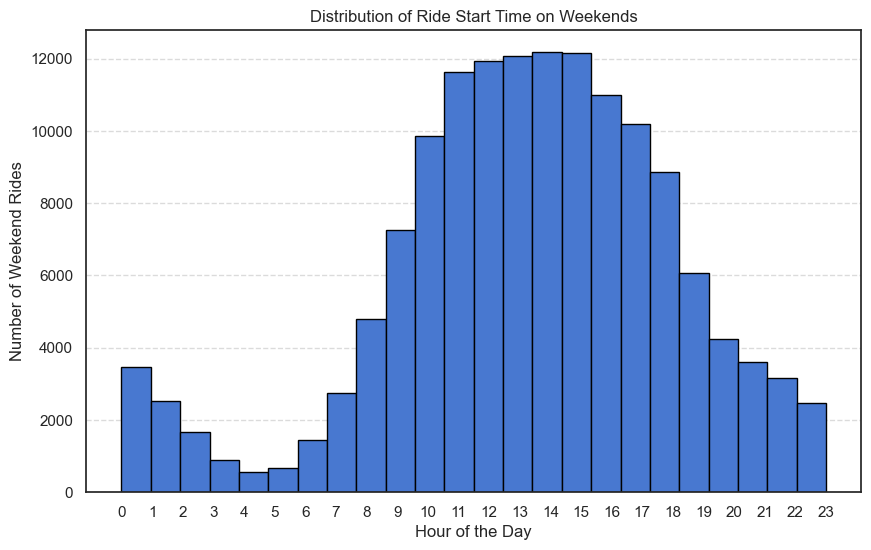

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(x=weekend_ride["started_at"].dt.hour, bins=24, edgecolor="black",)
plt.title("Distribution of Ride Start Time on Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Weekend Rides")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 6. Visualize patterns in ride start times on weekdays.

In [62]:
weekdays_ride = st[st["ride_day_category"].isin(["Weekday"])]
weekdays_ride

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_duration_sec,ride_duration_min,hour,minute,day_week,month,day_week_name,ride_time_category,ride_day_category,distance
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,...,729,12.15,17,23,2,10,Wednesday,Off-Peak,Weekday,3.740056
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,...,260,4.33,7,2,3,10,Thursday,Peak,Weekday,1.370740
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,326,5.43,19,13,1,10,Tuesday,Off-Peak,Weekday,0.806927
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,...,690,11.50,18,19,0,10,Monday,Off-Peak,Weekday,0.806927
5,F7D7420AFAC53CD9,electric_bike,2023-10-04 17:10:59,2023-10-04 17:25:21,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898124,-87.637533,...,862,14.37,17,10,2,10,Wednesday,Off-Peak,Weekday,2.931804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537108,CB82F1F5D0505469,classic_bike,2023-10-30 07:35:46,2023-10-30 07:49:30,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,...,824,13.73,7,35,0,10,Monday,Peak,Weekday,1.947185
537109,E2C362589E4AD3A9,classic_bike,2023-10-10 06:29:55,2023-10-10 06:45:19,Clark St & Lincoln Ave,13179,Fairbanks Ct & Grand Ave,TA1305000003,41.915689,-87.634600,...,924,15.40,6,29,1,10,Tuesday,Off-Peak,Weekday,2.893854
537110,965D4156EDECF21A,classic_bike,2023-10-26 06:26:23,2023-10-26 06:39:43,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,...,800,13.33,6,26,3,10,Thursday,Off-Peak,Weekday,1.947185
537111,0919ED32225E4D31,classic_bike,2023-10-09 08:47:29,2023-10-09 08:47:33,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,...,4,0.07,8,47,0,10,Monday,Peak,Weekday,0.000000


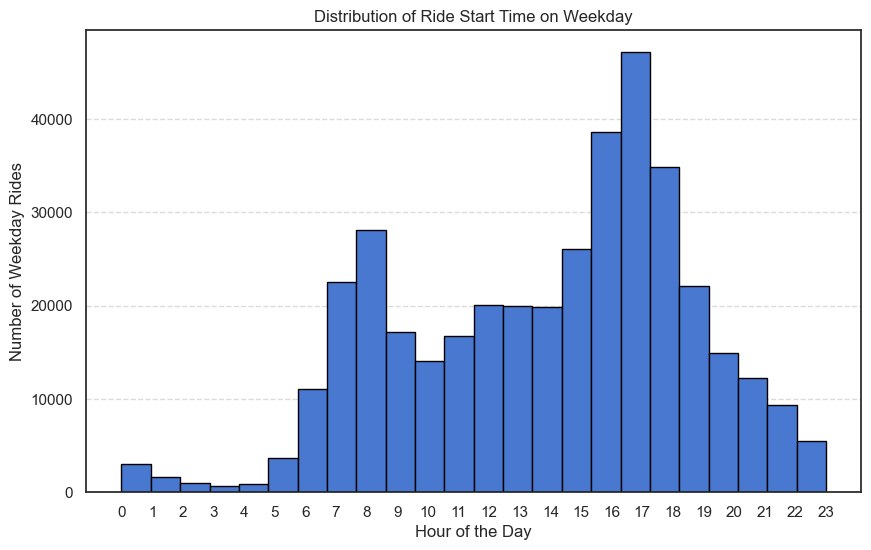

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(x=weekdays_ride["started_at"].dt.hour, bins=24, edgecolor="black",)
plt.title("Distribution of Ride Start Time on Weekday")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Weekday Rides")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 7. Visualize the number of trips by month of the year.

In [64]:
monthly_ride_count = st["month"].value_counts().to_frame().reset_index()
monthly_ride_count

,month,count
0,10,536521


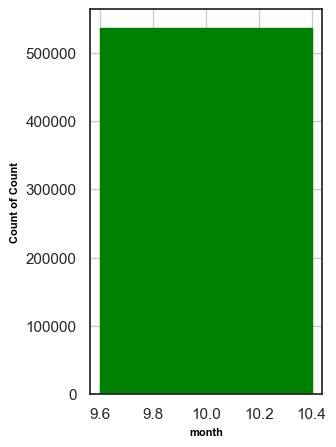

In [65]:
x = monthly_ride_count["month"]
y = monthly_ride_count["count"]

plt.figure(figsize=(3,5))
plt.bar(x,y, color="green", edgecolor = "green")
plt.xlabel("month", fontsize=8, fontweight="bold", color = "black")
plt.ylabel("Count of Count", fontsize=8, fontweight="bold", color = "black")
plt.grid()

### 8. Visualize the number of trips by day of the week.

In [66]:
daily_ride_count = st["day_week_name"].value_counts().to_frame().reset_index()
daily_ride_count

,day_week_name,count
0,Tuesday,95301
1,Sunday,84867
2,Monday,83106
3,Wednesday,79023
4,Thursday,69844
5,Friday,63756
6,Saturday,60624


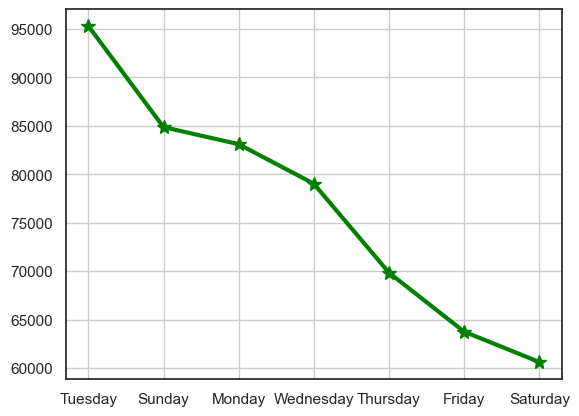

In [67]:
x = daily_ride_count["day_week_name"]
y = daily_ride_count["count"]

plt.plot(x,y, color="green", lw=3, ls="-", marker="*", ms=10)
plt.grid()

### 9. Visualize the number of trips by hour of the day.

In [68]:
daily_ride_hour = st["hour"].value_counts().to_frame().reset_index()
daily_ride_hour

,hour,count
0,17,57343
1,16,49533
2,18,43742
3,15,38252
4,8,32928
5,13,32054
6,14,32051
7,12,31967
8,11,28346
9,19,28121


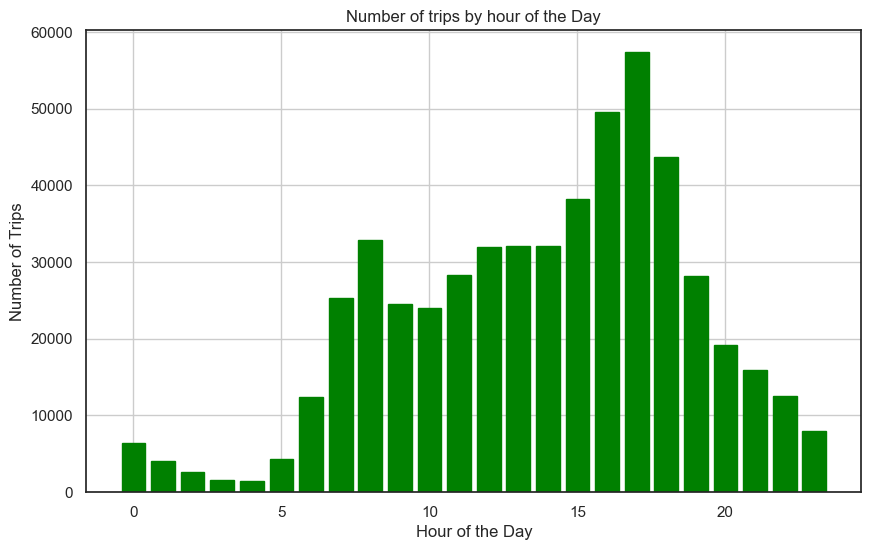

In [69]:
x = daily_ride_hour["hour"]
y = daily_ride_hour["count"]

plt.figure(figsize=(10,6))
plt.bar(x,y, color="green", edgecolor = "green")
plt.title("Number of trips by hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.grid()
plt.show()

### 10. Visual relationship between time of the day and distance of trips.

In [70]:
x = st["hour"]
y = st["distance"]

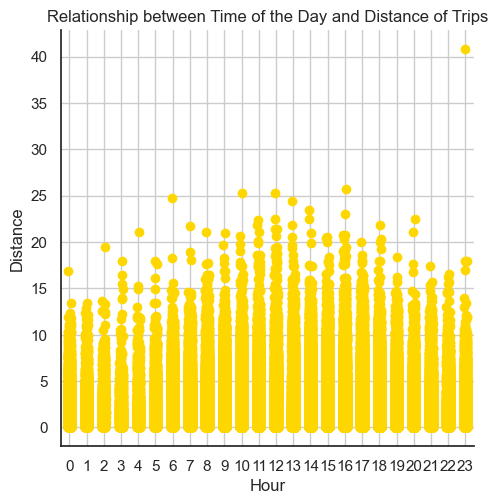

In [71]:
sns.catplot(x="hour", y="distance", data=st,color='gold',size=7)
plt.title("Relationship between Time of the Day and Distance of Trips")
plt.xlabel("Hour")
plt.ylabel("Distance")
plt.grid()
plt.show()